In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
N=2193

column_names = ['Year', 'Month', 'Day', 'Sunspot_Number']
url="https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
df = pd.read_csv(url, delim_whitespace=True, skiprows=24473,nrows=2008, header=None, names=column_names)
df


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19996\1258087344.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, skiprows=24473,nrows=2008, header=None, names=column_names)


,Year,Month,Day,Sunspot_Number
0,2012,1,1,39
1,2012,1,2,60
2,2012,1,3,68
3,2012,1,4,64
4,2012,1,5,63
...,...,...,...,...
2003,2017,6,26,17
2004,2017,6,27,17
2005,2017,6,28,13
2006,2017,6,29,10


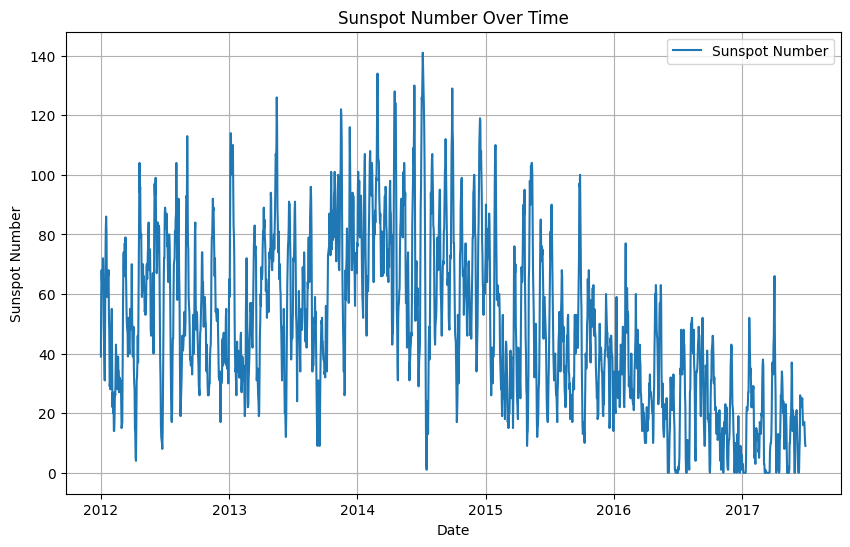

In [63]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
#T=df['Date'][1]-df['Date'][0]
T=1
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sunspot_Number'], label='Sunspot Number')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19996\875076598.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


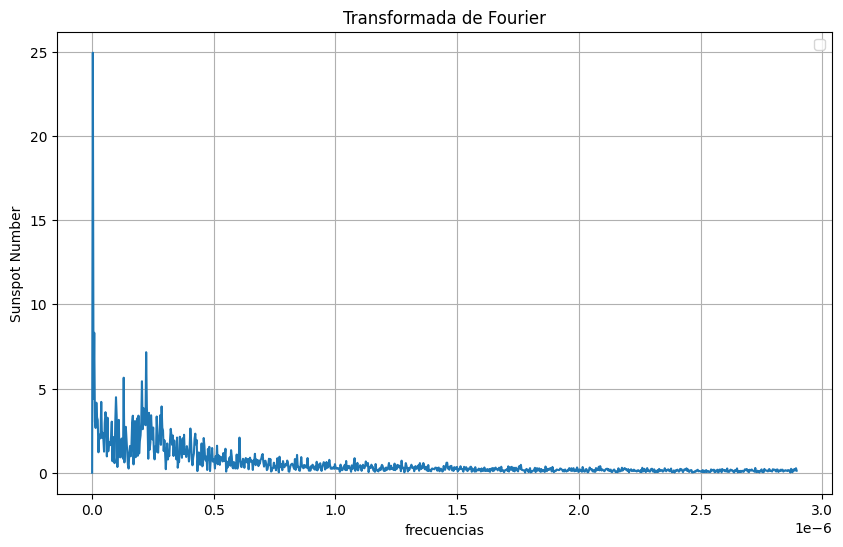

In [64]:

f_muestreo=1/86400
f_Ny=f_muestreo/2
datos=df['Sunspot_Number']
N = len(df['Sunspot_Number'])
yf=np.fft.fft(df['Sunspot_Number'])
y_mag= np.abs(yf)/N
y_mag_plot= 2*y_mag[0:int(N/2+1) ]
y_mag_plot[0]= 0

f=np.linspace(0,f_Ny,N)

f_plot=f[0:int(N/2+1)]




plt.figure(figsize=(10, 6))
plt.plot(f_plot, y_mag_plot)
plt.xlabel('frecuencias')
plt.ylabel('Sunspot Number')
plt.title('Transformada de Fourier')
plt.legend()
plt.grid(True)
plt.show()





In [65]:
ind_max=np.argmax(y_mag_plot)
frecuencia_max_s=f_plot[ind_max]
frecuencia_max_dia=frecuencia_max_s*86400
frecuencia_max_dia


np.float64(0.00024912805181863477)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19996\157680555.py:9: RuntimeWarning: divide by zero encountered in log10
  log_yf_filtr=np.log10(np.abs(yf_filtrada))


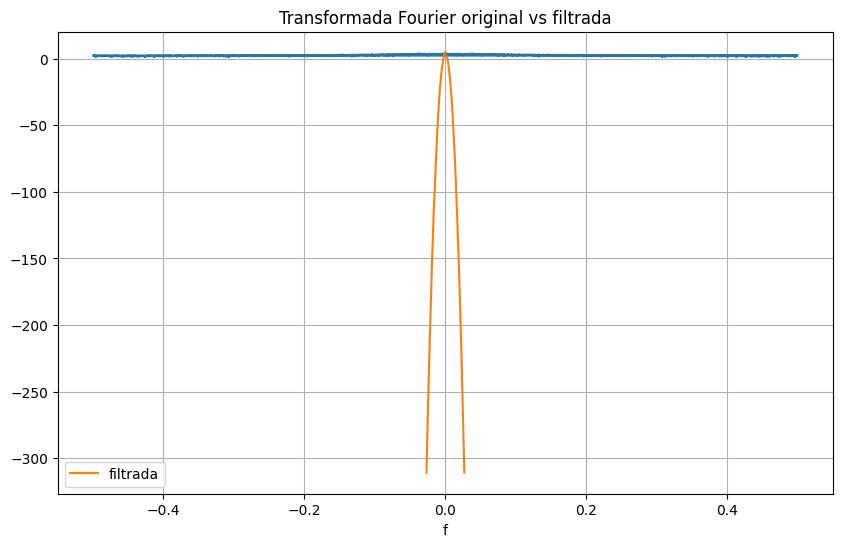

In [66]:
#1.2
fn=np.fft.fftfreq(N)
alfa=1000
filtro = np.exp(-(fn*alfa)**2)
yf_filtrada=yf*filtro


log_yf=np.log10(np.abs(yf))
log_yf_filtr=np.log10(np.abs(yf_filtrada))

Datos_filtr=np.fft.ifft(yf_filtrada)
plt.figure(figsize=(10, 6))
plt.plot(fn[4:],log_yf[4:])
plt.plot(fn[4:],log_yf_filtr[4:],label='filtrada')
plt.xlabel('f')
plt.ylabel('')
plt.title('Transformada Fourier original vs filtrada')
plt.legend()
plt.grid(True)
plt.show()





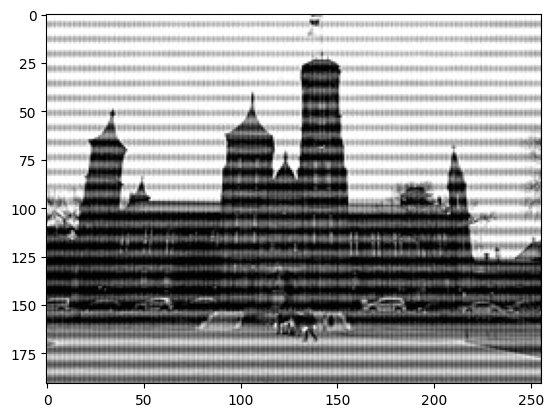

In [67]:
#2
from PIL import Image
img  = np.array(Image.open("Castillo.jpg.jpg")).astype(float)
plt.imshow(img, cmap='gray')



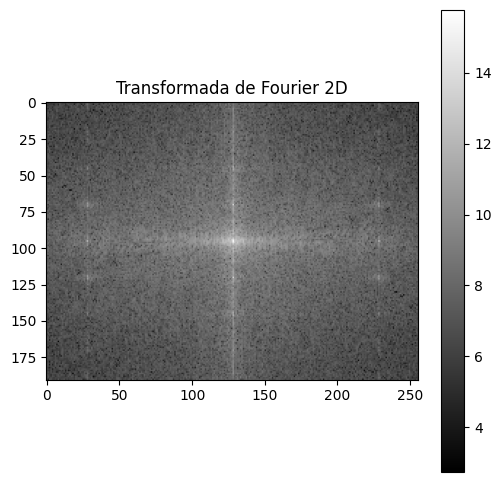

In [68]:
#2.1

Trans=np.fft.fft2(img)
Transshift=np.fft.fftshift(Trans)
Trans_mag=np.abs(Transshift)
Trans_mag_log=np.log1p(Trans_mag)

plt.figure(figsize=(6, 6))
plt.imshow(Trans_mag_log, cmap='gray')
plt.colorbar()
plt.title("Transformada de Fourier 2D")
plt.show()

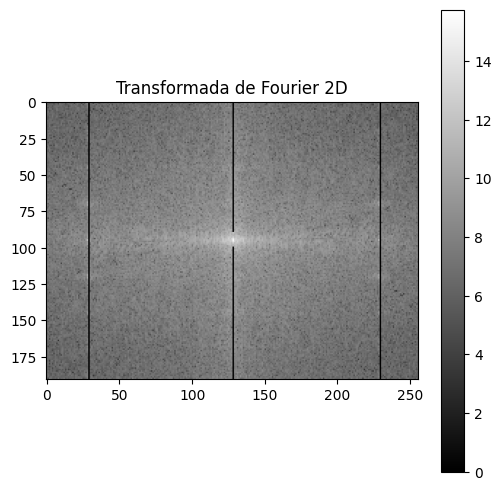

In [72]:
fila, columna=img.shape
filas=np.array(fila)
columnas=np.array(columna)
c_filas=fila//2
c_columnas=columna//2
filtro2 = np.ones((fila, columna), dtype=np.float32)
filtro2[:c_filas-5, c_columnas] = 0 
filtro3 = np.ones((fila, columna), dtype=np.float32)
filtro3[(c_filas+5):, c_columnas]=0

filtro4 = np.ones((fila, columna), dtype=np.float32)
filtro4[:fila,229]=0

filtro5= np.ones((fila, columna), dtype=np.float32)
filtro5[:fila,29]=0


Trans_filtr_log=Trans_mag_log*filtro2*filtro3*filtro4*filtro5

Trans_mag_filtr=Transshift*filtro2*filtro3*filtro4*filtro5

plt.figure(figsize=(6, 6))
plt.imshow(Trans_filtr_log, cmap='gray')
plt.colorbar()
plt.title("Transformada de Fourier 2D")
plt.show()







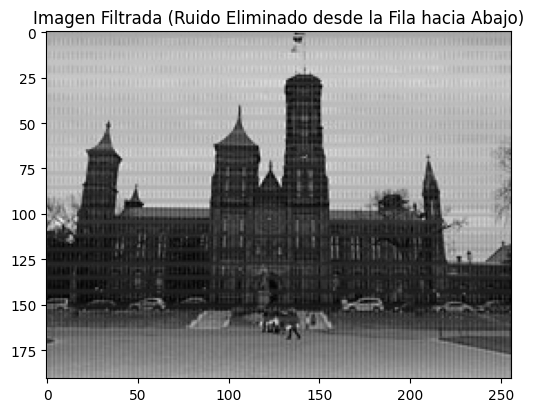

In [73]:
ishiftTransf = np.fft.ifftshift(Trans_mag_filtr)
iTransf = np.fft.ifft2(ishiftTransf)
img_filtr = np.abs(iTransf)




plt.figure(figsize=(6, 6))
plt.imshow(img_filtr, cmap='gray')
plt.title("Imagen Filtrada")
plt.show()
